In [12]:
import Data

data,sta,date,lon,lat,P,d,t,s,rho,isop,si,ti = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,31,32,33,34,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/research/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


271.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,31,32,33,34,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


271.0 13.0
271.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,31,32,33,34,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


271.0 13.0


In [13]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [14]:
#dir()
#locals()
#globals()
data.head()

,Cruise,Station,Type,date,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,231-Pa error,Th,230-Th error,PaTh,Pa/Th error,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,rho,TRAN_01 [%],FLOR_01 [mg/m**3],sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],"Oxygen, SBE 43 [umol/Kg]","Oxygen, SBE 43 [ml/l]","Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Unnamed: 52,Unnamed: 53,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],Nitrate-1 [?mol/L],Nitrate-2 [?mol/L],Phosphate-1 [?mol/L],Phosphate-2 [?mol/L],Silicate-1 [?mol/L],Silicate-2 [?mol/L],Ammonium-1 [?mol/L],Ammonium-2 [?mol/L]
0,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,7,6.940,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.327,26.182964,NaN,NaN,33.3184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33165.0,308.472,7.08798,102.23218,6.93322,6.94424,2.5814,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,8,7.932,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3266,26.181990,NaN,NaN,33.3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,306.462,7.04178,101.56426,6.93332,6.94435,2.5744,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,9,8.924,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.326,26.182461,NaN,NaN,33.3176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,307.238,7.05961,101.82020,6.93341,6.94444,2.5722,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,10,9.915,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3253,26.182787,NaN,NaN,33.3179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,307.296,7.06094,101.83797,6.93351,6.94454,2.5717,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,11,10.906,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3249,26.181654,NaN,NaN,33.3164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33163.0,307.042,7.05510,101.75160,6.93365,6.94468,2.5709,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# All stations; Pa & Th data

In [15]:
from wand.image import Image as WImage
img= WImage(filename='/ocean/mgrenier/geotraces/research/Geotraces2015data/Figures/PaThStationsGreyPal_Map.png')
#img

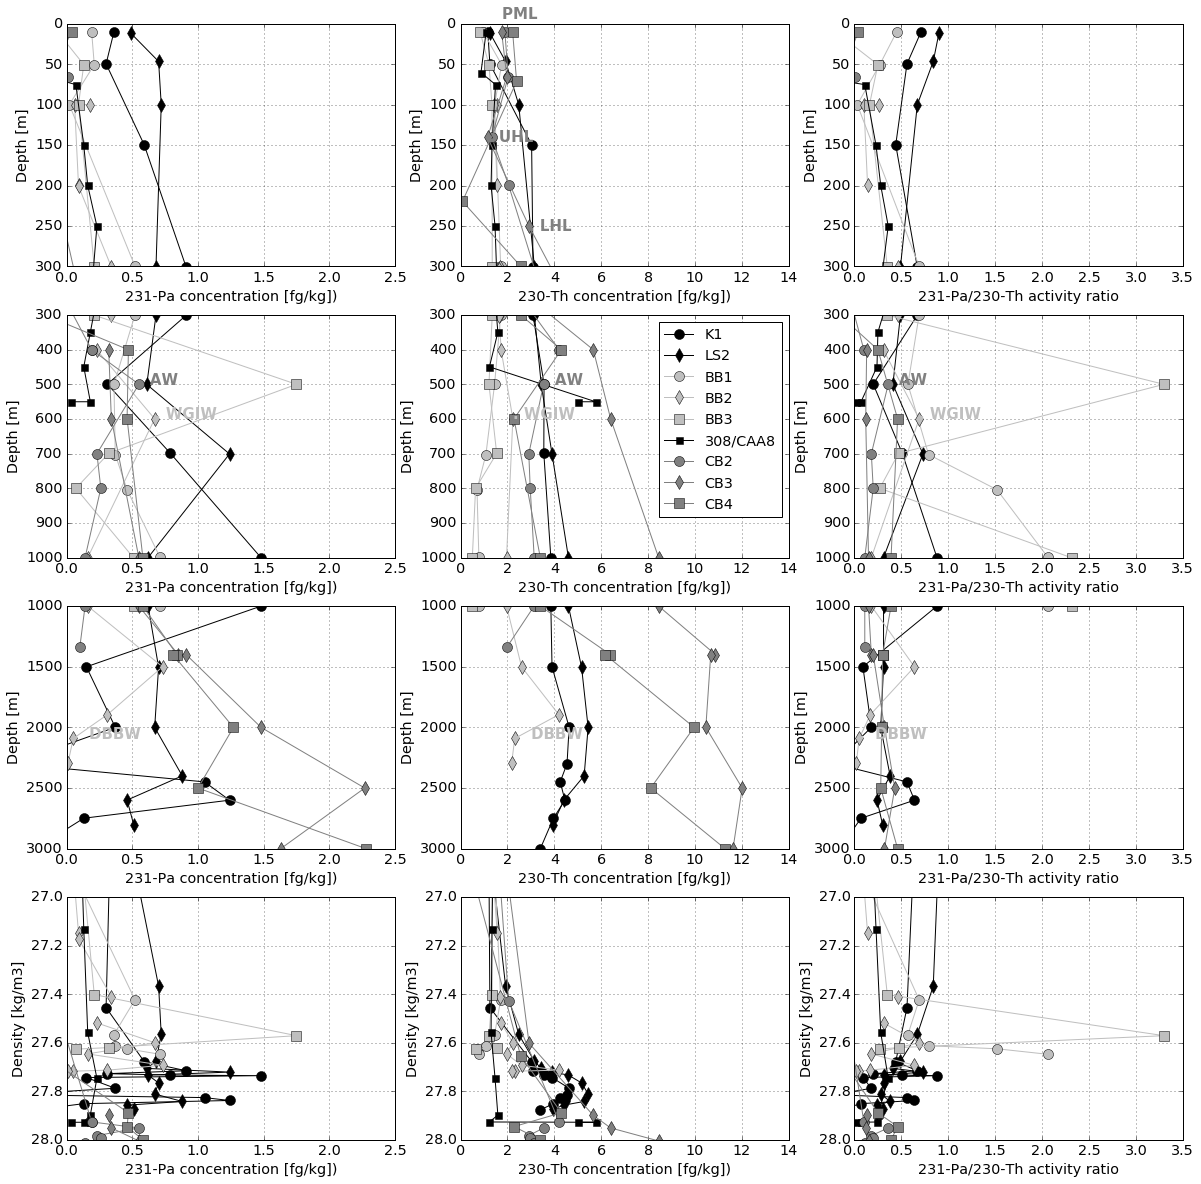

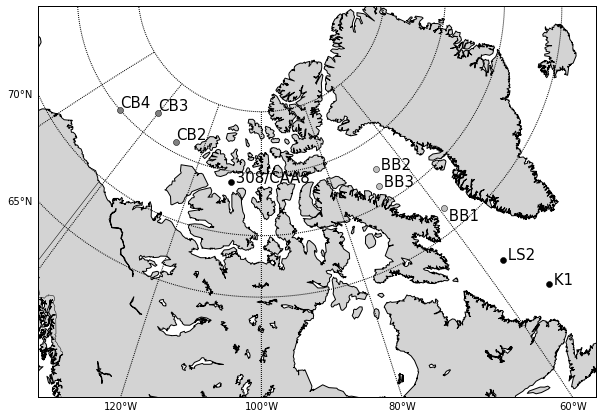

In [16]:
fig,((ax1, ax2, ax3), (ax4,ax5, ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,20))
'''gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[0, :-2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[1, :-2])
ax4 = plt.subplot(gs[1, -2])
ax5 = plt.subplot(gs[-2, :-2])
ax6 = plt.subplot(gs[-2, -2])
ax7 = plt.subplot(gs[-1, :-2])
ax8 = plt.subplot(gs[-1, -2:])
ax9 = plt.subplot(gs[0, -1])
ax10 = plt.subplot(gs[1, -1])
ax11 = plt.subplot(gs[-2, -1])
'''

#Plot Pa/Th sample profiles

M3=3.5
for station,M,S,C in zip(('K1','LS2','BB1','BB2','BB3','308/CAA8','CB2','CB3','CB4'),
                        ('o-','d-','o-','d-','s-','s-','o-','d-','s-'),
                        (10,10,10,10,10,7,10,10,10),('0','0','0.75','0.75','0.75','0','0.5','0.5','0.5')):
    for ax,xfield,yfield,xlabels,ylabels,xranges,yranges in zip(
                                    (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12),
                                    (PaThDataSorted.Pa,PaThDataSorted.Th,PaThDataSorted.PaTh,PaThDataSorted.Pa,PaThDataSorted.Th,PaThDataSorted.PaTh,PaThDataSorted.Pa,PaThDataSorted.Th,PaThDataSorted.PaTh,PaThDataSorted.Pa,PaThDataSorted.Th,PaThDataSorted.PaTh),
                                    (PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.d,PaThDataSorted.rho,PaThDataSorted.rho,PaThDataSorted.rho),
                                    ('231-Pa concentration [fg/kg])','230-Th concentration [fg/kg])','231-Pa/230-Th activity ratio','231-Pa concentration [fg/kg])','230-Th concentration [fg/kg])','231-Pa/230-Th activity ratio','231-Pa concentration [fg/kg])','230-Th concentration [fg/kg])','231-Pa/230-Th activity ratio','231-Pa concentration [fg/kg])','230-Th concentration [fg/kg])','231-Pa/230-Th activity ratio'),
                                    ('Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Depth [m]','Density [kg/m3]','Density [kg/m3]','Density [kg/m3]'),
                                    ([0,2.5],[0,14],[0,M3],[0,2.5],[0,14],[0,M3],[0,2.5],[0,14],[0,M3],[0,2.5],[0,14],[0,M3]),
                                    ([0,300],[0,300],[0,300],[300, 1000],[300, 1000],[300, 1000],[1000, 3000],[1000, 3000],[1000, 3000],[27,28],[27,28],[27,28])):
     
        ax.plot(xfield[data.Station == station],yfield[data.Station == station],M,markersize=S,mew=0.5,color=C,label=station)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()




# Water mass identification
# 0-300 m
PML = PaThDataSorted[(PaThDataSorted.Station == 'CB3') & (PaThDataSorted.d > 5) & (PaThDataSorted.d < 25)] # Polar Mixed Layer
ArcW = data[(data.Station == 'BB2') & (data.Cast == 18.0) & (data.P == 150)] # Arctic Water
UHL = PaThDataSorted[(PaThDataSorted.Station == 'CB3') & (PaThDataSorted.d > 120) & (PaThDataSorted.d < 150)] # Lower Halocline Layer
LHL = PaThDataSorted[(PaThDataSorted.Station == 'CB3') & (PaThDataSorted.d > 230) & (PaThDataSorted.d < 270)] # Lower Halocline Layer
# 300-1000 m
AW = PaThDataSorted[(PaThDataSorted.Station == 'CB2') & (PaThDataSorted.d > 450) & (PaThDataSorted.d < 550)] # Atlantic Water
WGIW = PaThDataSorted[(PaThDataSorted.Station == 'BB2') & (PaThDataSorted.d > 550) & (PaThDataSorted.d < 650)] # West Greenland Intermediate Water
# 1000-3000 m
DBBW = PaThDataSorted[(PaThDataSorted.Station == 'BB2') & (PaThDataSorted.d > 2000) & (PaThDataSorted.d < 2200)] #Deep Baffin Bay Water

# 0-300 m

ax2.annotate('PML \n\n',xy=(PML.Th,PML.d),horizontalalignment='left',verticalalignment='center',
                fontsize=15,color='0.5',fontweight='bold')
'''
for ax,name,xfield,yfield,pos in zip((ax1,ax2,ax3),('ArcW','ArcW','ArcW'),(ArcW.Pa,ArcW.Th,ArcW.PaTh),
                            (ArcW.d,ArcW.d,ArcW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')
'''
ax2.annotate('. UHL',xy=(UHL.Th,UHL.d),horizontalalignment='left',verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

ax2.annotate('. LHL',xy=(LHL.Th,LHL.d),horizontalalignment='left',verticalalignment='center',fontsize=15,color='0.5',fontweight='bold')

# 300-1000 m

for ax,name,xfield,yfield,pos in zip((ax4,ax5,ax6),('. AW','. AW','. AW'),(AW.Pa,AW.Th,AW.PaTh),
                            (AW.d,AW.d,AW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.5',fontweight='bold')

for ax,name,xfield,yfield,pos in zip((ax4,ax5,ax6),('. WGIW','. WGIW','. WGIW'),(WGIW.Pa,WGIW.Th,WGIW.PaTh),
                            (WGIW.d,WGIW.d,WGIW.d),('left','left','left')
                            ):
    ax.annotate(name,xy=(xfield,yfield),horizontalalignment=pos,fontsize=15,color='0.75',fontweight='bold')

# 1000-3000 m

for ax,xfield,yfield in zip((ax7,ax8,ax9),
                            (DBBW.Pa,DBBW.Th,DBBW.PaTh),
                            (DBBW.d,DBBW.d,DBBW.d)
                            ):
    ax.annotate('.  DBBW',xy=(xfield,yfield),horizontalalignment='left',fontsize=15,color='0.75',fontweight='bold')


for ax, in zip((ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12)):
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

ax5.legend(loc='best',numpoints=1,framealpha=1,frameon=True)
'''
handles, labels = ax1.get_legend_handles_labels()
ax3.legend(handles[8:16],labels[8:16],loc='best',numpoints=1,framealpha=0,frameon=False)
ax3.add_artist(CTD)
'''
#drawIsopycnals(nlevels = 6, levels, rotate = TRUE, rho1000 = FALSE,digits = 2, eos = getOption("oceEOS", default = "gsw"), cex = 0.75 * par("cex"), col = "darkgray", lwd = par("lwd"), lty = par("lty"))
savefig('Figures/PaThStationsGreyPal_Pa-Th-PaTh.png',bbox_inches='tight')

plt.show()
img